# WeatherPy
----

#### Mudit's Analysis 
* 1) The most distinguishable observation comes from the City Latitude vs. Max Temperature Graph. The closer that a city gets to the equator, the higher the max temperature. However the peak temperatures from the data set seem to occur more along 20 degrees latitude line instead of the equator, due to the tilt of the earth's axis in relation to the Sun.

* 2) City Latitude vs Humidity also shows that cities closer to the equator tend to have higher humidities. This correlation is apparent but not as strong as between City Latitude and Temperature.

* 3) There seems to be no discernible correlation between City Latitude to Wind Speed and Cloudiness. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random 

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=


In [4]:
# Create empty lists to append API calls 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Initialize record variable to 1 
record = 1

In [5]:
# Beginning print statement 
print(f'Beginning of Data Retrieval\n------------------------------------')

# Loop through the list of cities and perform a request for data on each
for city in cities:
    # Use try statement to keep appending even if city has missing value
    try:
        response = requests.get(f'{query_url}{city}').json()
        lat.append(response['coord']['lat'])
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        
        # Replace spaces in city name URL retrieved so it is not broken
        city_record = city.replace(" ", "%20") 
        
        # Print the output
        print(f'Processing Record {record} | {city}')
        print(f'{query_url}{city_record}')
        
        # Increase record by 1 
        record += 1
        
        # Pause for loop for 1 second so API rate is not exceeded
        time.sleep(1)
        
    # Skip to next city if missing data
    except:
        print("City not found. Skipping ... ")

Beginning of Data Retrieval
------------------------------------
Processing Record 1 | tekeli
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=tekeli
City not found. Skipping ... 
Processing Record 2 | georgetown
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=georgetown
Processing Record 3 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=longyearbyen
Processing Record 4 | hermanus
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=hermanus
Processing Record 5 | harboore
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=harboore
Processing Record 6 | provideniya
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=provideniya
Processing Record 7 | barrow
http

Processing Record 56 | geraldton
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=geraldton
Processing Record 57 | port alfred
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=port%20alfred
Processing Record 58 | hobart
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=hobart
Processing Record 59 | punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=punta%20arenas
Processing Record 60 | belyy yar
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=belyy%20yar
City not found. Skipping ... 
Processing Record 61 | bethel
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=bethel
Processing Record 62 | kahului
http://api.openweathermap.org/data/2.5/weather?appid=a08449

Processing Record 111 | sinnamary
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=sinnamary
Processing Record 112 | atar
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=atar
Processing Record 113 | lorengau
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=lorengau
Processing Record 114 | sitka
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=sitka
Processing Record 115 | san carlos
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=san%20carlos
Processing Record 116 | dikson
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=dikson
Processing Record 117 | north platte
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=

Processing Record 165 | san jose
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=san%20jose
Processing Record 166 | pringsewu
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=pringsewu
Processing Record 167 | paka
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=paka
Processing Record 168 | ucluelet
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=ucluelet
Processing Record 169 | puerto quijarro
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=puerto%20quijarro
Processing Record 170 | verkhnyaya inta
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=verkhnyaya%20inta
Processing Record 171 | sabang
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc5

Processing Record 220 | vallenar
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=vallenar
Processing Record 221 | fare
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=fare
City not found. Skipping ... 
Processing Record 222 | shostka
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=shostka
Processing Record 223 | mount gambier
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=mount%20gambier
Processing Record 224 | pindiga
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=pindiga
Processing Record 225 | san policarpo
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=san%20policarpo
Processing Record 226 | locri
http://api.openweathermap.org/data/2.5/weather?appid=a0844

Processing Record 275 | tateyama
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=tateyama
Processing Record 276 | binzhou
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=binzhou
Processing Record 277 | kita
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=kita
Processing Record 278 | nsanje
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=nsanje
Processing Record 279 | nazarovo
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=nazarovo
Processing Record 280 | baiquan
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=baiquan
City not found. Skipping ... 
City not found. Skipping ... 
Processing Record 281 | adra
http://api.openweathermap.org/data/2.5/weather?appid=a084

Processing Record 330 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=lavrentiya
Processing Record 331 | pedro juan caballero
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=pedro%20juan%20caballero
Processing Record 332 | kant
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=kant
Processing Record 333 | turbat
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=turbat
Processing Record 334 | terrak
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=terrak
Processing Record 335 | sandwick
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=sandwick
Processing Record 336 | fairbanks
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d4792

Processing Record 386 | siderno
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=siderno
Processing Record 387 | amga
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=amga
Processing Record 388 | saquarema
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=saquarema
Processing Record 389 | arlit
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=arlit
Processing Record 390 | sochaczew
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=sochaczew
Processing Record 391 | ovalle
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=ovalle
Processing Record 392 | goure
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=goure
Process

Processing Record 441 | thinadhoo
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=thinadhoo
Processing Record 442 | gualaquiza
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=gualaquiza
Processing Record 443 | turukhansk
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=turukhansk
Processing Record 444 | khorol
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=khorol
Processing Record 445 | ust-kuyga
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=ust-kuyga
Processing Record 446 | victoria
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=victoria
Processing Record 447 | sungaipenuh
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&

Processing Record 496 | pundaguitan
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=pundaguitan
Processing Record 497 | chaiyaphum
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=chaiyaphum
Processing Record 498 | xining
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=xining
Processing Record 499 | de aar
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=de%20aar
Processing Record 500 | gardner
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=gardner
Processing Record 501 | pokhara
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=imperial&q=pokhara
Processing Record 502 | millerovo
http://api.openweathermap.org/data/2.5/weather?appid=a0844959dd699a5bc56c05d47925efae&units=impe

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a dictionary to hold the lists 
cities_summary = {
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

# Convert the dictionary to a Data Frame 
weather_data = pd.DataFrame(cities_summary)

# Count the values column
weather_data.count()

City          532
Cloudiness    532
Country       532
Date          532
Humidity      532
Lat           532
Lng           532
Max Temp      532
Wind Speed    532
dtype: int64

In [7]:
# Export the data into a CSV 
weather_data.to_csv("../Data_CSV/weather_data.csv")

# Display data frame 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tekeli,54,KZ,1563660777,38,44.86,78.76,70.36,4.59
1,Georgetown,40,GY,1563660519,78,6.80,-58.16,82.40,9.17
2,Longyearbyen,75,NO,1563660475,87,78.22,15.63,42.80,8.05
3,Hermanus,100,ZA,1563660489,82,-34.42,19.24,46.99,11.01
4,Harboore,88,DK,1563660781,93,56.62,8.18,63.00,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

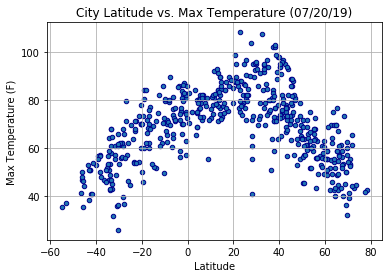

In [8]:
# Create a scatter plot of Lattitude vs. Temperature
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", edgecolors="darkblue", s=20)

# Incorporate graph properties
plt.title(("City Latitude vs. Max Temperature (%s)" % time.strftime("%x")))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the plot 
plt.savefig("../Plots/lat_temp.png")

# Display the plot
plt.show()

#### Latitude vs. Humidity Plot

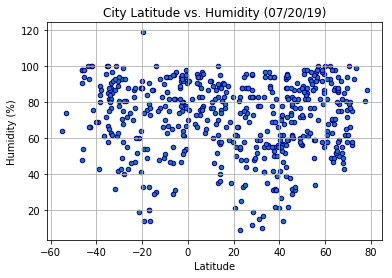

In [9]:
# Create a scatter plot of Lattitude vs. Humidity 
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", edgecolors="darkblue", s=20)

# Incorporate graph properties
plt.title(("City Latitude vs. Humidity (%s)" % time.strftime("%x")))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the plot 
plt.savefig("../Plots/lat_humidity.png")

# Display the plot
plt.show()

#### Latitude vs. Cloudiness Plot

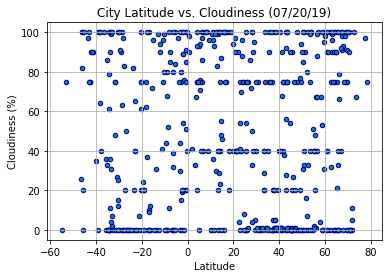

In [10]:
# Create a scatter plot of Lattitude vs. Cloudiness 
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", edgecolors="darkblue", s=20)

# Incorporate graph properties
plt.title(("City Latitude vs. Cloudiness (%s)" % time.strftime("%x")))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the plot 
plt.savefig("../Plots/lat_cloudiness.png")

# Display the plot
plt.show()

#### Latitude vs. Wind Speed Plot

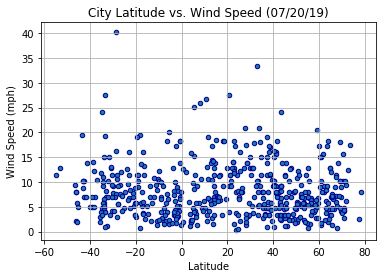

In [11]:
# Create a scatter plot of Lattitude vs. Wind Speed 
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", edgecolors="darkblue", s=20)

# Incorporate graph properties
plt.title(("City Latitude vs. Wind Speed (%s)" % time.strftime("%x")))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Save the plot 
plt.savefig("../Plots/lat_wind.png")

# Display the plot
plt.show()